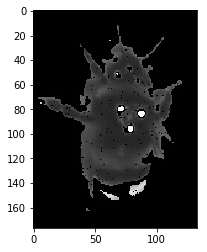

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
bee_im = cv2.imread('test.jpg')
bee_im = bee_im[...,0]
plt.imshow(bee_im,cmap=plt.cm.gray)

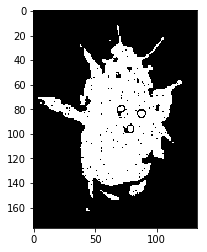

In [123]:
plt.imshow(bee_im>=10,cmap=plt.cm.gray)

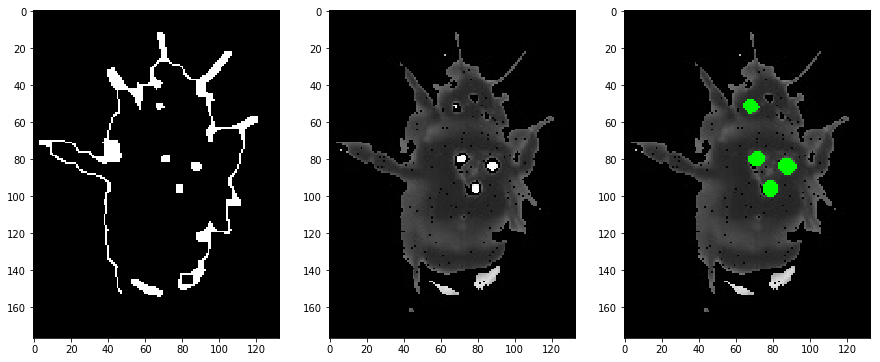

In [267]:
gaussian_blur=5
blurred=cv2.GaussianBlur(bee_im,(gaussian_blur,gaussian_blur),0)

params = [80,300]
edges = cv2.Canny(blurred,params[0],params[1])
edges = cv2.dilate(edges, None,iterations=2)
edges = cv2.erode(edges, None,iterations=2)

th = ((blurred>=5)*255).astype(np.uint8)
_, contours, _ = cv2.findContours(edges,
                                                 cv2.RETR_TREE,
                                                 cv2.CHAIN_APPROX_SIMPLE)
max_area  = 30
contours_filtered= list()
for con in contours:
    moments = cv2.moments(con)
    if moments['m00'] <=0:
        continue
    cx = moments['m10']/moments['m00']
    cy = moments['m01']/moments['m00']
    if moments['m00']<=max_area:
        contours_filtered.append(con)
        
toplot = bee_im.copy()
toplot = toplot[..., np.newaxis]
toplot = np.repeat(toplot, 3, axis=2)
cv2.drawContours(toplot, contours_filtered, -1, (0,255,0), 3)

f,axarr = plt.subplots(1,3, figsize=(15,8))
axarr[1].imshow(bee_im,cmap=plt.cm.gray)
axarr[0].imshow(edges,cmap=plt.cm.gray)
axarr[2].imshow(toplot)

In [140]:
cont.shape

(3, 1, 2)

(1, 3, 3)


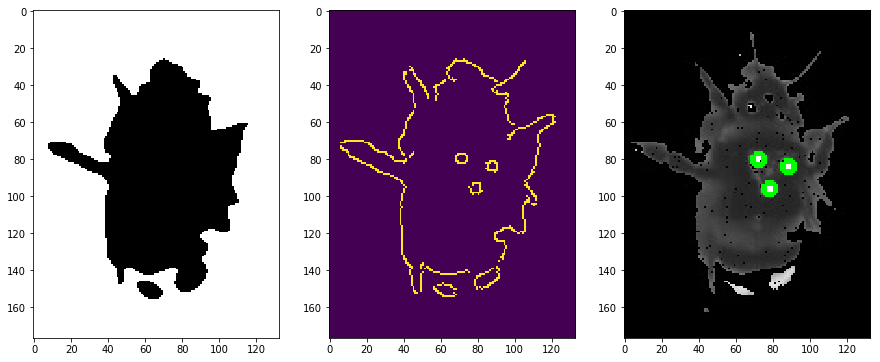

In [192]:
gaussian_blur=15
blurred=cv2.GaussianBlur(bee_im,(gaussian_blur,gaussian_blur),0)

params = [40,60]
edges = cv2.Canny(blurred,params[0],params[1])
circles = cv2.HoughCircles(blurred,cv2.HOUGH_GRADIENT,1,
                           minDist=10,
                           param1=params[1],
                           param2=10,
                           minRadius=0,maxRadius=5)

toplot = bee_im.copy()
toplot = toplot[..., np.newaxis]
toplot = np.repeat(toplot, 3, axis=2)
if circles is not None:
    print(circles.shape)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(toplot,(i[0],i[1]),i[2],(0,255,0),2)

blurred[blurred<35]=255
blurred[blurred<160]=0
f,axarr = plt.subplots(1,3, figsize=(15,8))
axarr[1].imshow(edges)
axarr[0].imshow(blurred,cmap=plt.cm.gray)
axarr[2].imshow(toplot)

(1, 1, 3)


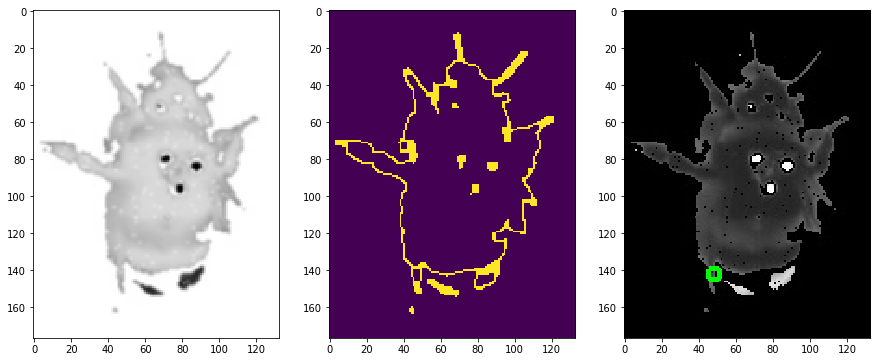

In [259]:
gaussian_blur=3
blurred=cv2.GaussianBlur(255-bee_im,(gaussian_blur,gaussian_blur),0)

params = [80,300]
edges = cv2.Canny(blurred,params[0],params[1])
edges = cv2.dilate(edges, None,iterations=1)
edges = cv2.erode(edges, None,iterations=1)
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,
                           minDist=10,
                           param1=params[1],
                           param2=8,
                           minRadius=0,maxRadius=4)

toplot = bee_im.copy()
toplot = toplot[..., np.newaxis]
toplot = np.repeat(toplot, 3, axis=2)
if circles is not None:
    print(circles.shape)
    circles = np.uint16(np.around(circles))
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(toplot,(i[0],i[1]),i[2],(0,255,0),2)

f,axarr = plt.subplots(1,3, figsize=(15,8))
axarr[1].imshow(edges)
axarr[0].imshow(blurred,cmap=plt.cm.gray)
axarr[2].imshow(toplot)

